In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
from scipy.optimize import curve_fit

In [7]:
# stehende Mikrowellen
V1_1 = pd.read_csv('./19_Mikrowellen/V1_1.csv', sep = ',', skipinitialspace = True)

V1_1_x = V1_1['pos'].str.strip(' ').drop(index = 0).dropna(axis = 'index').to_numpy().astype(float)
V1_1_E = V1_1['E'].str.strip(' ').drop(index = 0).dropna(axis = 'index').to_numpy().astype(float)


# Lecherleitung
V1_3 = pd.read_csv('./19_Mikrowellen/V1_3.csv', sep = ',', skipinitialspace = True)

V1_3_x = V1_3['pos'].str.strip(' ').drop(index = 0).dropna(axis = 'index').to_numpy().astype(float)
V1_3_E = V1_3['E'].str.strip().drop(index = 0).dropna(axis = 'index').to_numpy().astype(float)


# curve_fit
def E(x, E0, k, a):
    return 2*E0*abs(np.sin(k*x - a))

In [8]:
# Bestimmung der Fitparameter
popt_1_1, pcov_1_1 = curve_fit(E, V1_1_x, V1_1_E, bounds = ([4.1, 0., 0.], [6., 0.4, 100.]))
popt_1_3, pcov_1_3 = curve_fit(E, V1_3_x, V1_3_E, bounds = ([1, 0., 0.], [2, 0.4, 100.]))

popt_1_1, popt_1_3, pcov_1_1, pcov_1_3

(array([ 4.1       ,  0.19836225, 49.83816106]),
 array([ 1.63177431,  0.19548378, 50.0383327 ]),
 array([[1.28233794e-02, 2.09905968e-06, 4.21904281e-05],
        [2.09905968e-06, 1.02505582e-06, 1.14568766e-04],
        [4.21904281e-05, 1.14568766e-04, 1.36082004e-02]]),
 array([[4.94958597e-03, 4.96549801e-07, 1.04964166e-04],
        [4.96549801e-07, 3.66029385e-07, 4.53241130e-05],
        [1.04964166e-04, 4.53241130e-05, 7.50983756e-03]]))

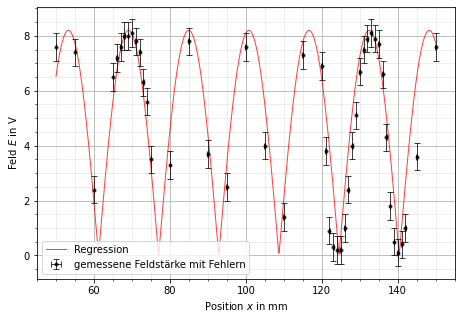

In [9]:
fig, ax = plt.subplots(figsize=(7.5,5))

xplot_1_1 = np.linspace(min(V1_1_x), max(V1_1_x), 1000)
#print(E(xplot_1_1, *popt_1_1))

#ax.set_title(r'Korrigierte Steigungen $mr^2$ für variierte Kugelradien')  
ax.set_xlabel(r'Position $x$ in mm')
ax.set_ylabel(r'Feld $E$ in V')
ax.grid()
ax.grid(which='minor', color='#999999', alpha=0.2, linestyle='-')
ax.minorticks_on()
ax.plot(xplot_1_1, E(xplot_1_1, *popt_1_1), color = 'red', alpha = 0.75, linewidth = 1, label = 'Regression')
ax.errorbar(V1_1_x, V1_1_E, xerr = 0.1, yerr = 0.5, fmt = '.', color = 'black', alpha = 0.75, linewidth=1, ecolor="black", capsize=3, label = 'gemessene Feldstärke mit Fehlern')
ax.legend()
ax.legend(loc="lower left")
plt.savefig('./19_Mikrowellen/V1_1.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

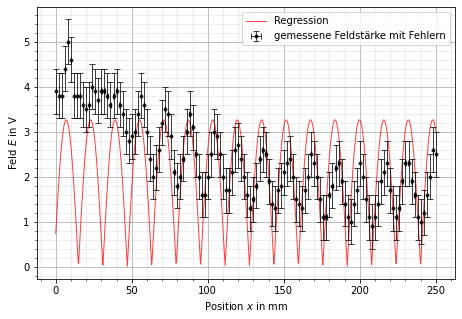

In [10]:
fig, ax = plt.subplots(figsize=(7.5,5))

xplot_1_3 = np.linspace(min(V1_3_x), max(V1_3_x), 1000)

#ax.set_title(r'Korrigierte Steigungen $mr^2$ für variierte Kugelradien')  
ax.set_xlabel(r'Position $x$ in mm')
ax.set_ylabel(r'Feld $E$ in V')
ax.grid()
ax.grid(which='minor', color='#999999', alpha=0.2, linestyle='-')
ax.minorticks_on()
ax.plot(xplot_1_3, E(xplot_1_3, *popt_1_3), color = 'red', alpha = 0.75, linewidth = 1, label = 'Regression')
ax.errorbar(V1_3_x, V1_3_E, xerr = 0.1, yerr = 0.5, fmt = '.', color = 'black', alpha = 0.75, linewidth=1, ecolor="black", capsize=3, label = 'gemessene Feldstärke mit Fehlern')
ax.legend()
ax.legend(loc="upper right")
plt.savefig('./19_Mikrowellen/V1_3.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()